# COMPONENTES PRINCIPALES PCA

## extracción de características

##  librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

### Principal Component Analysis (PCA)

La idea del **análisis de componentes principales** (PCA) es reducir la dimensionalidad de un conjunto de datos que consiste en un gran número de variables relacionadas, manteniendo al mismo tiempo tanta varianza en los datos como sea posible. PCA encuentra un conjunto de nuevas variables donde las variables originales son sólo sus combinaciones lineales. Las nuevas variables se denominan **componentes principales** (PC). Estos componentes principales son ortogonales: En un caso tridimensional, los componentes principales son perpendiculares entre sí. X no puede ser representado por Y o Y no puede ser presentado por Z.

La figura (A) muestra la intuición de PCA: "gira" los ejes para alinearse mejor con sus datos. El primer componente principal capturará la mayor parte de la varianza en los datos, seguido por el segundo, tercero, y así sucesivamente. Como resultado, los nuevos datos tendrán menos dimensiones.

![](https://miro.medium.com/max/371/1*d30YKpg-mAMWI3ekYM1plA.png)

In [2]:
# El conjunto de datos "iris":
file = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Cargamos el conjunto de datos en un dataframe
all_variables = ['sepal length','sepal width','petal length','petal width','target'] #ojo en el tarjet
features = ['sepal length','sepal width','petal length','petal width']
target = ['target']

df = pd.read_csv(file, names=all_variables)
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Todas las variables deben estar en la misma escala antes de aplicar PCA, de lo contrario una característica con valores grandes dominará el resultado. A continuación utilizo StandardScaler en scikit-learn para estandarizar las características del conjunto de datos en la escala de unidades (media = 0 y varianza = 1).

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

,sepal length,sepal width,petal length,petal width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


Hay 4 `features` o características en los datos originales. Así que PCA proporcionará el mismo número de componentes principales.

In [3]:
#
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,sepal length,sepal width,petal length,petal width
0,-2.684207,0.326607,-0.021512,0.001006
1,-2.715391,-0.169557,-0.203521,0.099602
2,-2.889820,-0.137346,0.024709,0.019305
3,-2.746437,-0.311124,0.037672,-0.075955
4,-2.728593,0.333925,0.096230,-0.063129


¿Cuáles son las varianzas de cada uno de los componentes principales?
El primer componente principal representa una variación del 92.46%, mientras que el segundo, tercero y cuarto representan una variación del 5.3%, 1.71% y 0.51%, respectivamente. Podemos decir que 92.46% + 5.3% = 97.76% de la información es captada por el primer y segundo componente principal. A menudo queremos mantener sólo las características significativas y eliminar las insignificantes. Una regla empírica es mantener los principales componentes principales que capturan la varianza significativa e ignorar los pequeños.

In [4]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

Podemos graficar el `dataframe` usando los dos primeros componentes.

In [5]:
df_pca['target'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','target']
df_pca.head()

,PC1,PC2,PC3,PC4,target
0,-2.684207,0.326607,-0.021512,0.001006,Iris-setosa
1,-2.715391,-0.169557,-0.203521,0.099602,Iris-setosa
2,-2.889820,-0.137346,0.024709,0.019305,Iris-setosa
3,-2.746437,-0.311124,0.037672,-0.075955,Iris-setosa
4,-2.728593,0.333925,0.096230,-0.063129,Iris-setosa


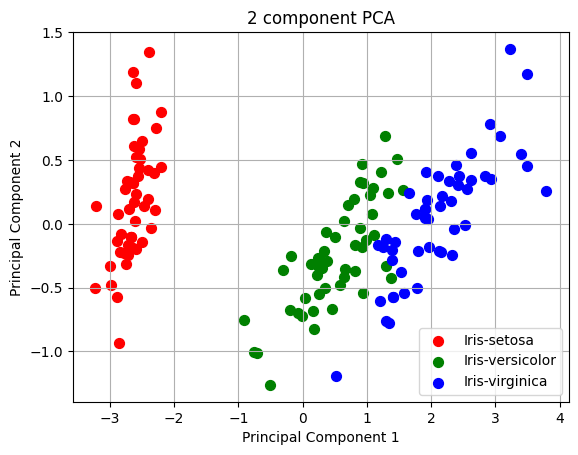

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

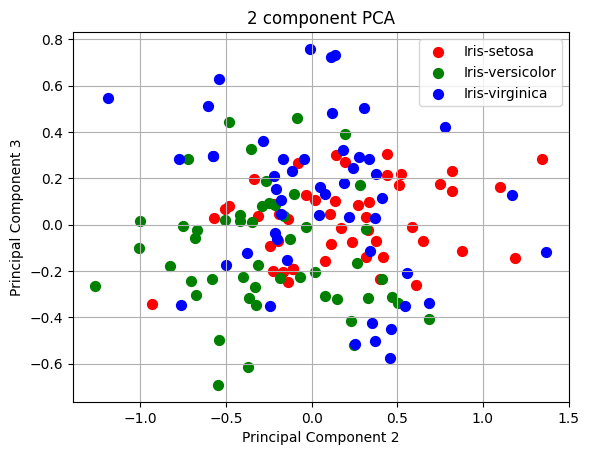

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2') 
ax.set_ylabel('Principal Component 3') 
ax.set_title('2 component PCA') 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC2']
    , df_pca.loc[indicesToKeep, 'PC3']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

### Kernel PCA (KPCA)

PCA aplica una **transformación lineal**, y esa también es su limitación. El Kernel PCA (KPCA) extiende PCA a la **no linealidad**. Primero mapea los datos originales a un espacio de características no lineales (normalmente de mayor dimensión), y luego aplica PCA para extraer los componentes principales de ese espacio. En la siguiente figura, el gráfico de la izquierda muestra que los puntos azules y rojos no pueden ser separados usando ninguna transformación lineal. Pero si todos los puntos se proyectan en un espacio tridimensional, ¡el resultado sí se puede separar linealmente! Entonces se aplica PCA para separar los componentes.

![](https://miro.medium.com/max/598/1*0iimd45B-RthXBoeugOKkg.png)

¿De dónde viene esta intuición? ¿Por qué la separación de componentes se hace más fácil en un espacio dimensional más alto? Esto tiene que ver con la teoría de Vapnik-Chervonenkis (VC):
> "*el mapeo en un espacio dimensional más alto, a menudo proporciona un mayor poder de clasificación*".

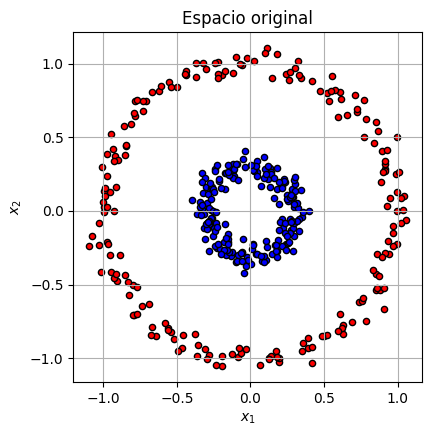

In [8]:
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()

Sin embargo, cuando proyectamos el círculo a un espacio dimensional más alto y lo separamos usando PCA, el primer y segundo componente principal resultante son separables. A continuación se muestra el resultado de que los puntos se trazan contra el primer y segundo componente principal. Dibujo una línea para separar los puntos rojos y azules. En KPCA especificamos kernel='rbf', que es la Función Base Radial, o la distancia Euclidiana. Los RBFs se usan comúnmente como kernel en técnicas de aprendizaje automático como el Support Vector Machine (SVM).

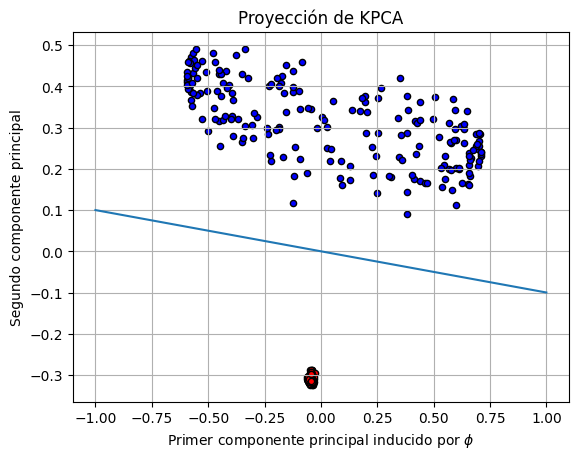

In [12]:
kpca = KernelPCA(kernel = "rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(x, -0.1*x, linestyle="solid")
plt.title("Proyección de KPCA")
plt.xlabel("Primer componente principal inducido por $\phi$")
plt.ylabel("Segundo componente principal")
plt.grid()

¿Probemos otro gamma?



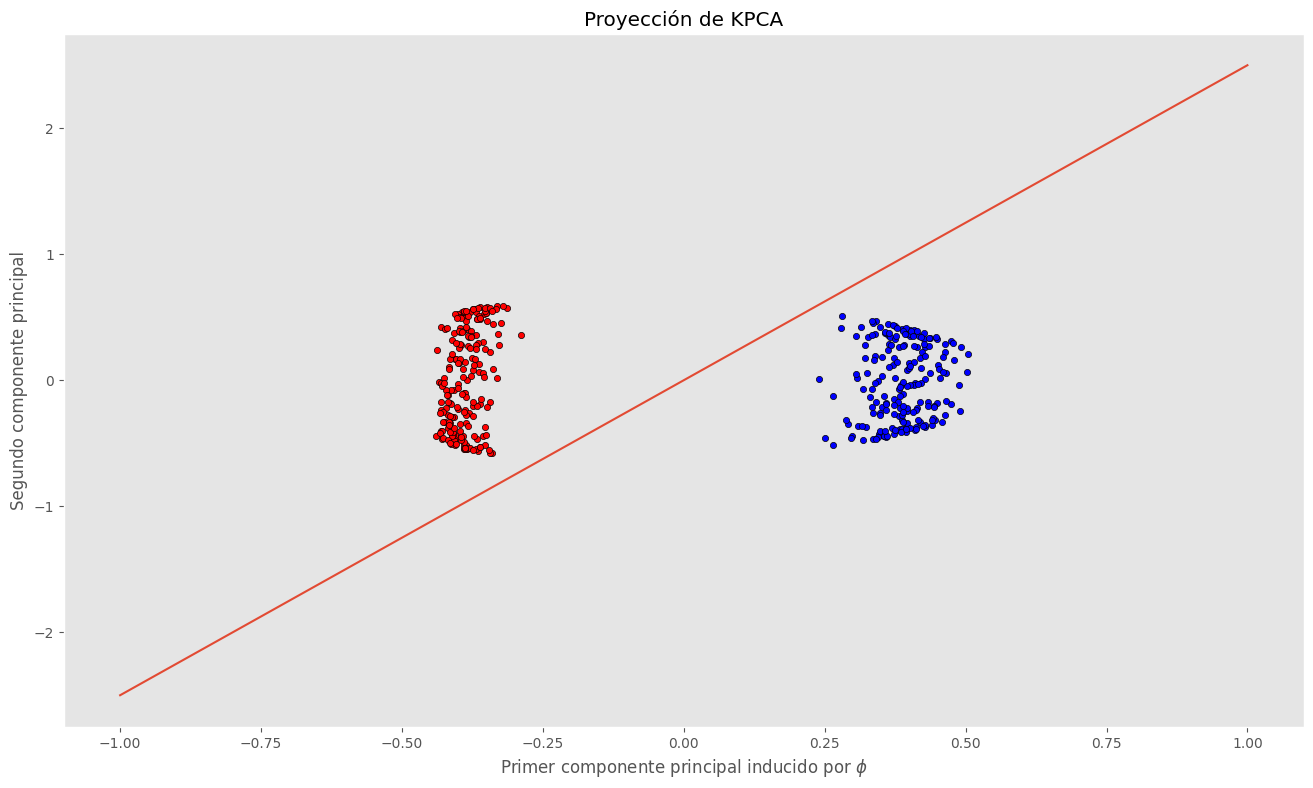

In [42]:
kpca = KernelPCA(kernel = "rbf", fit_inverse_transform=True, gamma=2)
X_kpca = kpca.fit_transform(X)


plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(x, 2.5*x, linestyle="solid")
plt.title("Proyección de KPCA")
plt.xlabel("Primer componente principal inducido por $\phi$")
plt.ylabel("Segundo componente principal")
plt.grid()

### Ejecicio

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [44]:
dataframe = pd.read_csv(r"comprar_alquilar.csv")
dataframe.tail(10)
# REFERENCIAS:
# ingresos y gastos son mensuales de 1 personas o 2 si están casados.
# trabajo: 0-sin trabajo 1-autonomo 2-asalariado 3-empresario 4-Autonomos 5-Asalariados 6-Autonomo y Asalariado 7-Empresario y Autonomo 8 Empresarios o empresario y autónomo
# estado_civil: 0-soltero 1-casado 2-divorciado
# hijos: Cantidad de hijos menores (no trabajan)
# comprar: 0-mejor alquilar 1-Comprar casa
# hipoteca fija a 30 años con interes

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
192,4653,1024,447,703,16952,392957,0,0,3,0
193,3390,881,194,584,34601,304112,2,2,5,0
194,2969,623,72,620,29663,289205,2,2,6,0
195,4169,1292,48,333,28503,239872,2,1,7,1
196,4054,1095,371,440,22183,223971,1,0,3,0
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0
201,3988,1157,105,382,11980,257580,0,0,4,0


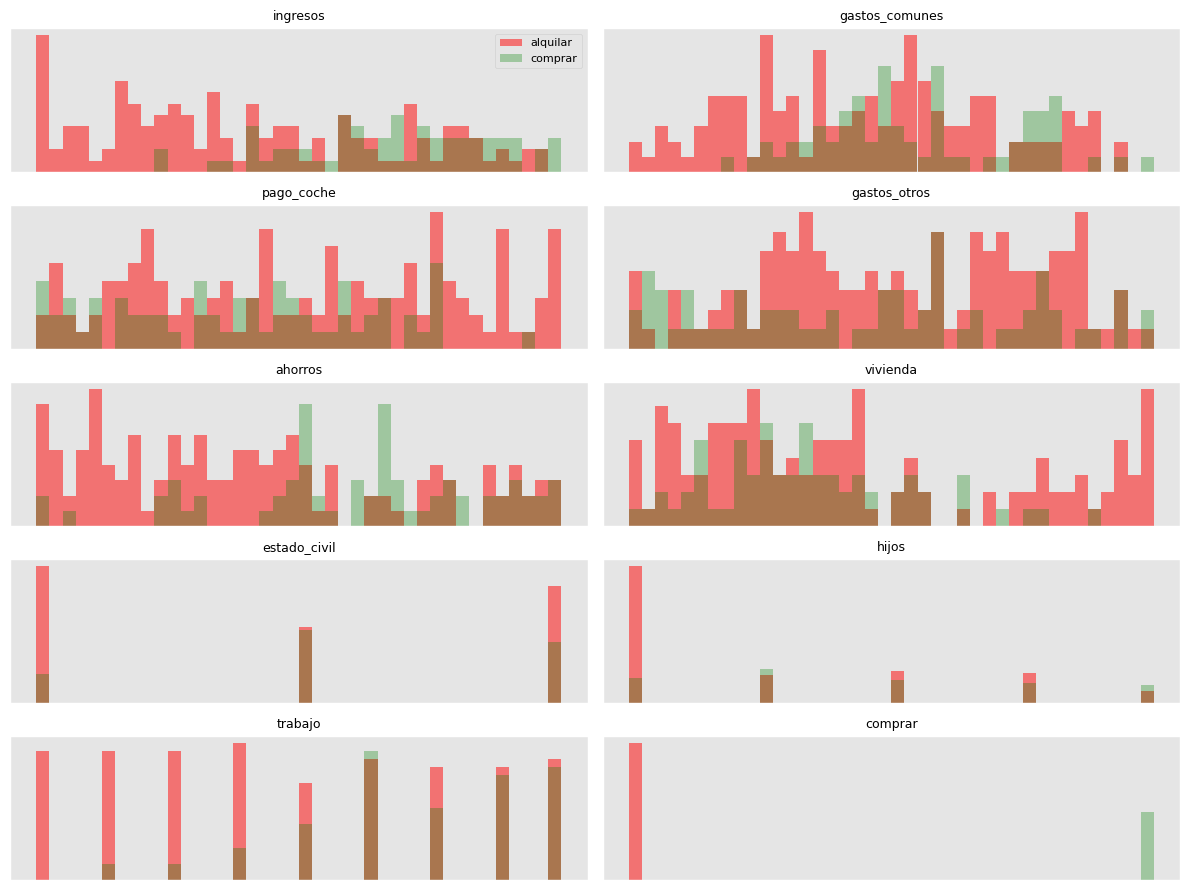

In [45]:
fig,axes =plt.subplots(5,2, figsize=(12, 9)) # 2 columnas cada una con 5 figuras, total 10 features
alquilar=dataframe[dataframe['comprar']==0] # conviene alquilar casa
comprar=dataframe[dataframe['comprar']==1] # conviene comprar casa
ax=axes.ravel()
for i in range(len(dataframe.columns)):
  _,bins=np.histogram(dataframe[dataframe.columns[i]],bins=40)
  ax[i].hist(alquilar.values[:,i],bins=bins,color='r',alpha=.5)# rojo alquilar
  ax[i].hist(comprar.values[:,i],bins=bins,color='g',alpha=0.3)# verde para comprar
  ax[i].set_title(dataframe.columns[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False)
  ax[i].set_yticks(())
ax[0].legend(['alquilar','comprar'],loc='best',fontsize=8)
plt.tight_layout()
plt.show()

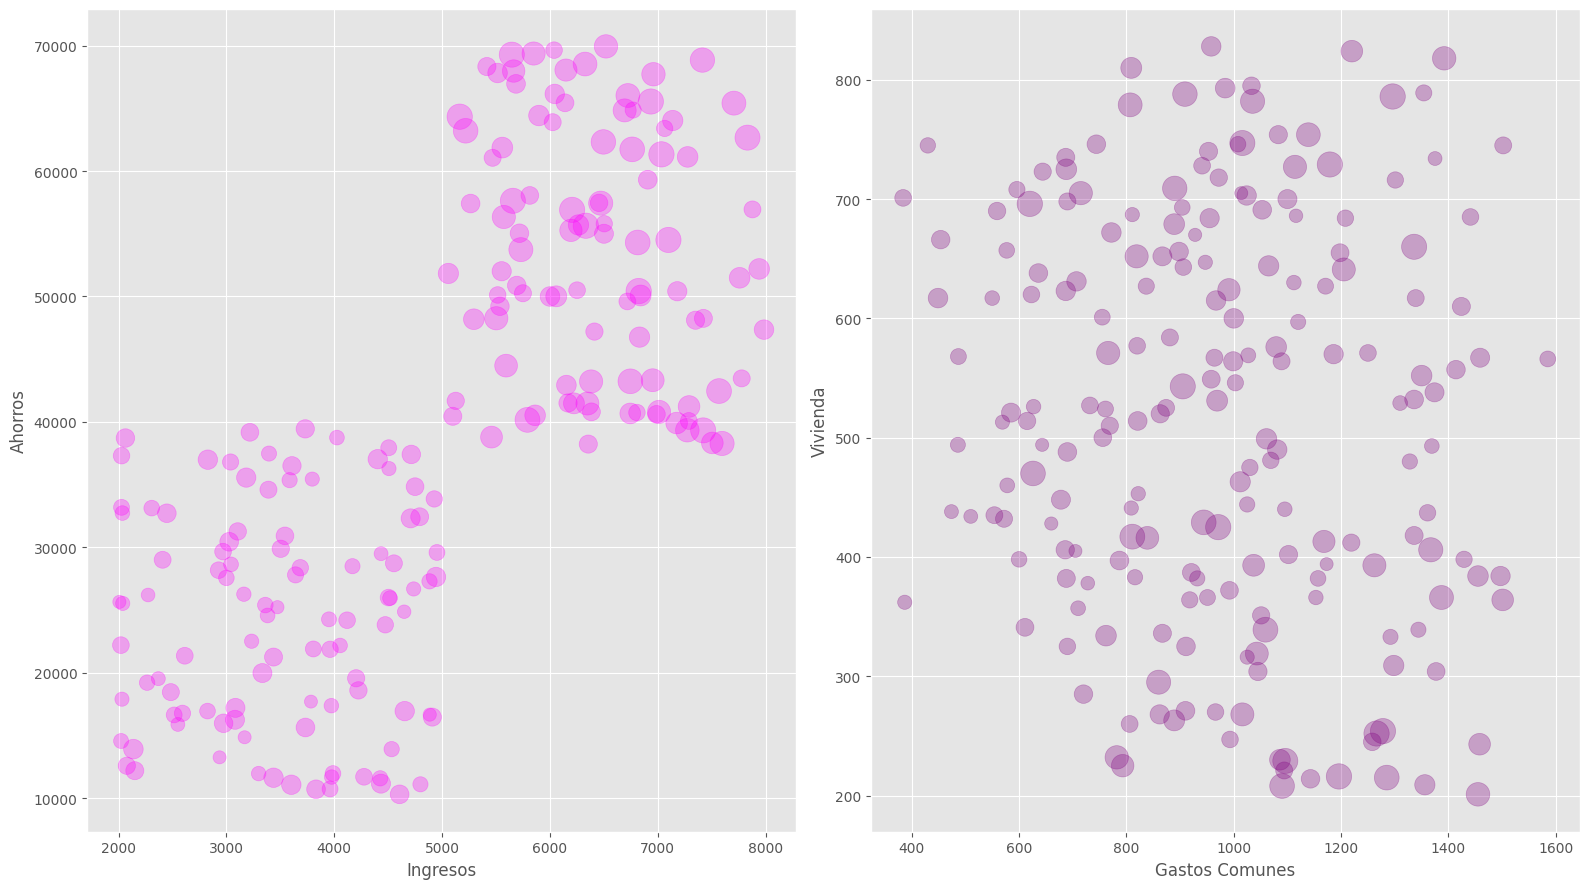

In [46]:
plt.subplot(1,2,1)#fisrt plot
plt.scatter(dataframe['ingresos'], dataframe['ahorros'], s=dataframe['vivienda']*0.0005, color='magenta', label='check', alpha=0.3)
plt.xlabel('Ingresos',fontsize=12)
plt.ylabel('Ahorros',fontsize=12)
plt.subplot(1,2,2)# 2nd plot
plt.scatter(dataframe['gastos_comunes'], dataframe['gastos_otros'], s=dataframe['vivienda']*0.0005, color='purple', label='check', alpha=0.3)
plt.xlabel('Gastos Comunes',fontsize=12)
plt.ylabel('Vivienda',fontsize=12)
plt.tight_layout()
plt.show()

In [47]:
scaler=StandardScaler()#instantiate
df = dataframe.drop(['comprar'], axis=1)
scaler.fit(df) # calcula la media y estandar para cada dimension
X_scaled=scaler.transform(df)# transforma los datos a su nueva escala

In [48]:
pca=PCA(n_components=9)
#pca=PCA(.85)
pca.fit(X_scaled) # buscar los componentes principales
X_pca=pca.transform(X_scaled) 
#revisemos la forma del array
print("shape of X_pca", X_pca.shape)

shape of X_pca (202, 9)


In [49]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))
#con 5 componentes tenemos algo mas del 85% de varianza explicada

[0.29913557 0.23294923 0.11711241 0.10685622 0.09635279 0.05629866
 0.04145579 0.03017819 0.01966115]
suma: 0.852406211771431


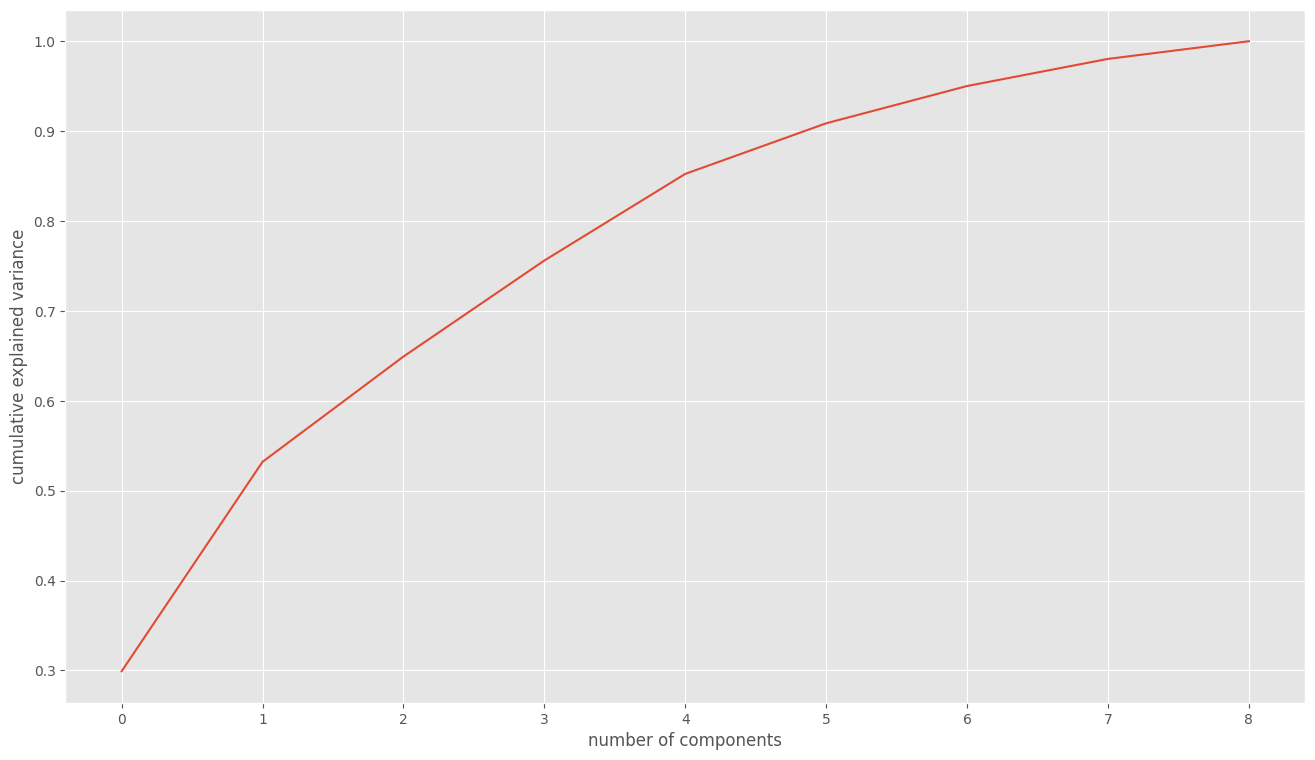

In [50]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

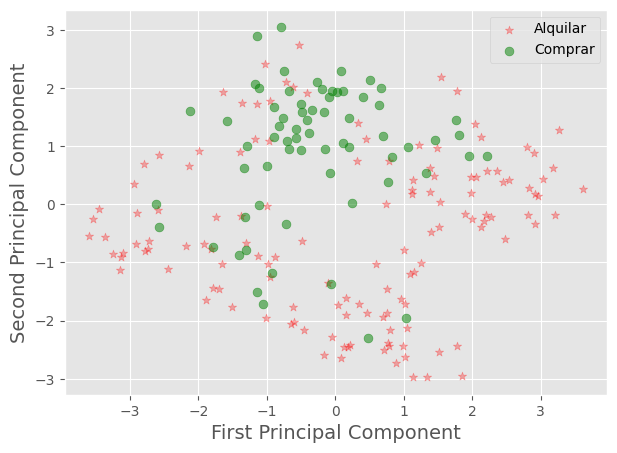

In [51]:
Xax=X_pca[:,0]
Yax=X_pca[:,1]
labels=dataframe['comprar'].values
#labels=[0,1] # Malignant, Beningn
cdict={0:'red',1:'green'}
labl={0:'Alquilar',1:'Comprar'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()


C:\Users\LUIGGI\AppData\Local\Temp\ipykernel_26912\4273424691.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


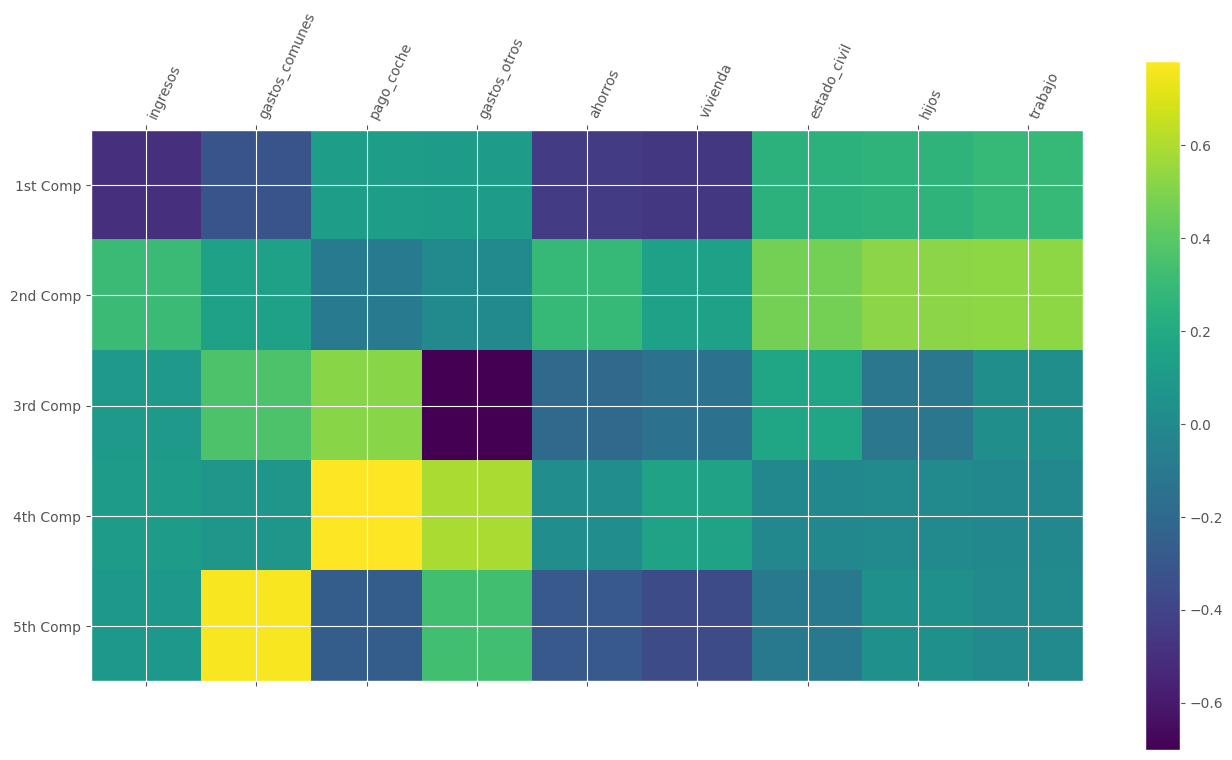

In [52]:
plt.matshow(pca.components_[0:5],cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(df.columns)),df.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [63]:
pca.fit(X_scaled) # buscar los componentes principales
X_pca=pca.transform(X_scaled) 
#revisemos la forma del array
print("shape of X_pca", X_pca.shape)

shape of X_pca (202, 9)


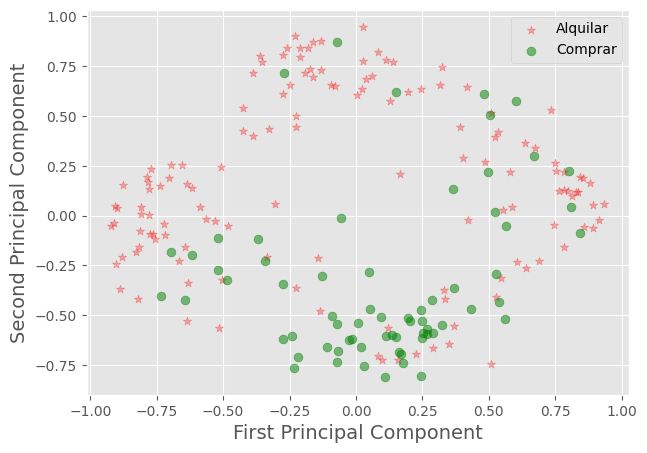

In [69]:
kpca = KernelPCA(kernel = "cosine", fit_inverse_transform=True, gamma=100)
X_kpca = kpca.fit_transform(X_scaled)
Xax=X_kpca[:,0]
Yax=X_kpca[:,1]
labels=dataframe['comprar'].values
#labels=[0,1] # Malignant, Beningn
cdict={0:'red',1:'green'}
labl={0:'Alquilar',1:'Comprar'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()


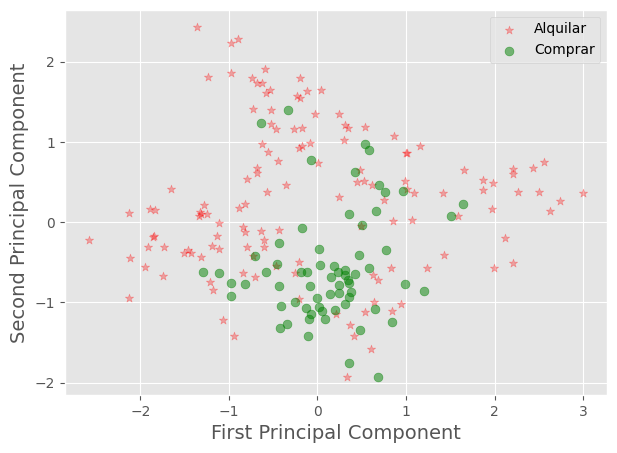

In [74]:
kpca = KernelPCA(kernel = "poly", fit_inverse_transform=True, degree=3)
X_kpca = kpca.fit_transform(X_scaled)
Xax=X_kpca[:,0]
Yax=X_kpca[:,1]
labels=dataframe['comprar'].values
#labels=[0,1] # Malignant, Beningn
cdict={0:'red',1:'green'}
labl={0:'Alquilar',1:'Comprar'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(Xax[ix],Yax[ix],c=cdict[l],label=labl[l],s=40,marker=marker[l],alpha=alpha[l])

plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()


In [ ]:
https://github.com/krishnadulal/Feature-Selection-in-Machine-Learning-using-Python-All-Code/blob/master/PCA/%20Feature%20Dimention%20Reduction%20Using%20LDA%20and%20PCA%20with%20Python%20%7C%20Principal%20Component%20Analysis%20in%20Feature%20Selection%20%7C%20KGP%20Talkie%20.ipynb